In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

path = r"C:\Users\Michael Caouette\Desktop\QMB3302\Analytics & Machine Learning Overview\Unsupervised Learning & Clustering\segments.csv"

df = pd.read_csv(path)
df.head(100)

,age,Income,Under18AtHome,HomeOwnership,subscribe,Segment
0,45.0,50033.0,4,0,0,Suburban
1,25.0,10835.0,3,0,0,Urban
2,46.0,63281.0,1,0,0,Suburban
3,40.0,46201.0,2,1,0,Suburban
4,41.0,49343.0,1,1,0,Suburban
...,...,...,...,...,...,...
95,60.0,NaN,0,0,0,ExSuburban
96,32.0,25889.0,1,1,0,ExUrban
97,NaN,66240.0,2,0,0,Suburban
98,42.0,58708.0,0,1,0,Suburban


In [2]:
df = pd.DataFrame(df)
first_column = df.pop('Segment')
df.insert(0,'Segment', first_column)
display(df)

,Segment,age,Income,Under18AtHome,HomeOwnership,subscribe
0,Suburban,45.0,50033.0,4,0,0
1,Urban,25.0,10835.0,3,0,0
2,Suburban,46.0,63281.0,1,0,0
3,Suburban,40.0,46201.0,2,1,0
4,Suburban,41.0,49343.0,1,1,0
...,...,...,...,...,...,...
995,Suburban,41.0,76813.0,3,1,0
996,Urban,21.0,30868.0,1,0,0
997,ExUrban,35.0,57097.0,4,1,0
998,ExUrban,38.0,45875.0,3,0,0


In [3]:
# I tried to use an Imputer to replace the NaN values below but was unable to figure how to 
df.values

array([['Suburban', 45.0, 50033.0, 4, 0, 0],
       ['Urban', 25.0, 10835.0, 3, 0, 0],
       ['Suburban', 46.0, 63281.0, 1, 0, 0],
       ...,
       ['ExUrban', 35.0, 57097.0, 4, 1, 0],
       ['ExUrban', 38.0, 45875.0, 3, 0, 0],
       ['Urban', nan, nan, 0, 1, 0]], dtype=object)

from sklearn.impute import SimpleImputer
s_imputer=SimpleImputer(missing_values=np.nan, strategy='mean', verbose =0)
df.values

s_imputer=s_imputer.fit(df.iloc[:,1:5])
df.iloc[:,1:5]=s_imputer.transform(df.iloc[:,1:5])
df

In [4]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
df2 = imputer.fit_transform(df.iloc[:,1:6])

df2

array([[4.5000e+01, 5.0033e+04, 4.0000e+00, 0.0000e+00, 0.0000e+00],
       [2.5000e+01, 1.0835e+04, 3.0000e+00, 0.0000e+00, 0.0000e+00],
       [4.6000e+01, 6.3281e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00],
       ...,
       [3.5000e+01, 5.7097e+04, 4.0000e+00, 1.0000e+00, 0.0000e+00],
       [3.8000e+01, 4.5875e+04, 3.0000e+00, 0.0000e+00, 0.0000e+00],
       [4.3500e+01, 7.8150e+04, 0.0000e+00, 1.0000e+00, 0.0000e+00]])

In [5]:
df2=pd.DataFrame(df2)

df2 = df2.rename({0: 'age', 1: 'income', 2:"Under18AtHome", 3:'HomeOwnership', 4:'subscribe'}, axis='columns')

df2

,age,income,Under18AtHome,HomeOwnership,subscribe
0,45.0,50033.0,4.0,0.0,0.0
1,25.0,10835.0,3.0,0.0,0.0
2,46.0,63281.0,1.0,0.0,0.0
3,40.0,46201.0,2.0,1.0,0.0
4,41.0,49343.0,1.0,1.0,0.0
...,...,...,...,...,...
995,41.0,76813.0,3.0,1.0,0.0
996,21.0,30868.0,1.0,0.0,0.0
997,35.0,57097.0,4.0,1.0,0.0
998,38.0,45875.0,3.0,0.0,0.0


In [6]:
merge = pd.merge(df, df2, left_index=True, right_index=True)
merge

,Segment,age_x,Income,Under18AtHome_x,HomeOwnership_x,subscribe_x,age_y,income,Under18AtHome_y,HomeOwnership_y,subscribe_y
0,Suburban,45.0,50033.0,4,0,0,45.0,50033.0,4.0,0.0,0.0
1,Urban,25.0,10835.0,3,0,0,25.0,10835.0,3.0,0.0,0.0
2,Suburban,46.0,63281.0,1,0,0,46.0,63281.0,1.0,0.0,0.0
3,Suburban,40.0,46201.0,2,1,0,40.0,46201.0,2.0,1.0,0.0
4,Suburban,41.0,49343.0,1,1,0,41.0,49343.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,Suburban,41.0,76813.0,3,1,0,41.0,76813.0,3.0,1.0,0.0
996,Urban,21.0,30868.0,1,0,0,21.0,30868.0,1.0,0.0,0.0
997,ExUrban,35.0,57097.0,4,1,0,35.0,57097.0,4.0,1.0,0.0
998,ExUrban,38.0,45875.0,3,0,0,38.0,45875.0,3.0,0.0,0.0


In [7]:
merge = merge.drop(['age_x', 'Income', 'Under18AtHome_x',"subscribe_x", 'HomeOwnership_x'], axis = 1)
merge

,Segment,age_y,income,Under18AtHome_y,HomeOwnership_y,subscribe_y
0,Suburban,45.0,50033.0,4.0,0.0,0.0
1,Urban,25.0,10835.0,3.0,0.0,0.0
2,Suburban,46.0,63281.0,1.0,0.0,0.0
3,Suburban,40.0,46201.0,2.0,1.0,0.0
4,Suburban,41.0,49343.0,1.0,1.0,0.0
...,...,...,...,...,...,...
995,Suburban,41.0,76813.0,3.0,1.0,0.0
996,Urban,21.0,30868.0,1.0,0.0,0.0
997,ExUrban,35.0,57097.0,4.0,1.0,0.0
998,ExUrban,38.0,45875.0,3.0,0.0,0.0


### Data Cleansing

I actually took a unique route with filling in the missing values from this data set.Im pretty sure a majority of machine learning algos. require numeric input values to be present for each row and column. I heard about these operations that python offers which are called statistical imputation. Which it essential does depending on the parameter or type of imputer function that you use will replace null values in the data set with the parameter that you select and examples include averages(which you can do with a lamda function I think), mean, median or the mode.

The Imputer used was KNNImputer: Each sample missing value are imputed using the mean value from n_neighbors nearest neighbors found in the training set.

In [8]:
merge.describe()

,age_y,income,Under18AtHome_y,HomeOwnership_y,subscribe_y
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000
mean,38.17400,54446.031500,1.809000,0.405000,0.12200
std,16.79982,19224.426707,1.378557,0.491138,0.32745
min,19.00000,8653.000000,0.000000,0.000000,0.00000
25%,33.00000,44735.750000,1.000000,0.000000,0.00000
50%,38.00000,56221.500000,2.000000,0.000000,0.00000
75%,43.00000,66312.875000,3.000000,1.000000,0.00000
max,500.00000,129638.000000,9.000000,1.000000,1.00000


In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


In [10]:
elbow_sse = {}
for k in range(1, 5):
    km = KMeans(n_clusters=k,
                random_state=1957)
    km.fit(merge.iloc[:, 1:5])
    elbow_sse[k] = km.inertia_

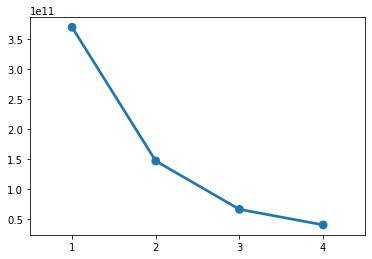

In [11]:
sns.pointplot(x=list(elbow_sse.keys()), y=list(elbow_sse.values()))
plt.show()

In [12]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=1957)
kmeans.fit(merge.iloc[:, 1:5])

df_cluster2 = merge.iloc[:, 1:5].assign(Cluster=kmeans.labels_)

df_cluster2.groupby('Cluster').agg({
    'income': 'mean',
    'age_y': ['mean', 'count'],
}).round(0)


income age_y      
            mean  mean count
Cluster                     
0        53227.0  39.0   514
1        24139.0  27.0   186
2        75325.0  44.0   300

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
merge = scale.fit_transform(merge.iloc[:, 1:5])
merge

In [13]:
merge = pd.melt(merge.assign(Cluster=kmeans.labels_).reset_index(),
                        id_vars=['Segment', 'Cluster'],
                        value_vars=["income",'age_y',],
                        var_name='category', 
                        value_name='Value'
                       )

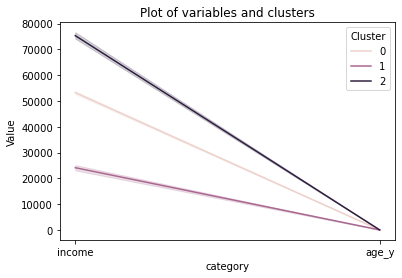

In [14]:
plt.title('Plot of variables and clusters')
sns.lineplot(data=merge, x='category', y='Value', hue='Cluster')
plt.show()

### Interpretation/Reflection

I tried to break the cluster into two variables of income and age to see how the clusters would stack up with each other. The notion is that the older you are the more experience you have so you might earn a higher income. We see in the 3 clusters the higher the income the higer the mean age of the consumer. Say you are looking to build an apartment complex or a retirement community you can build a cluster model to see the income and age of the population in the region. Assume normal consumer behavior is to spend 28% gross income a month on hosuing now we can see what the mean income is and what the expected expenditure would be.

Case Example: Cluster 1 seems to be around someone starting to enter the job market maybe in a graduate program etc. Based on the income the consumer is most likely renting an apartment/room in a house and the median income is $24139.

Lets say in that market I am trying to find out whats the most they will spend on rent assuming they will spend $28% of there gross monthly income.

Calculation : 24139 / 12 = 2011. 58 * .28 = $563 

assume to have a competitive price in the market I will have to be around the $563 dollar a month range.

Those are the assumptions and I think that clustering is very benefial for understanding customer segmentaion/ behavior. I really enjoyed learning about this model and see many use cases for it. One thing that I noticed is that I may need to brush up on my statistics for understanding this model completely and I like to think that the code was very straigt forward but I would need to practice with it more to be comfortable.